In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/!/summary.csv')
df['date'] = df['date'].str.slice(stop=-3)
df['lambda_rate'] = df['lambda_count'] / df['file_count']

/Users/tkacperek/virtualenvs/mgr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


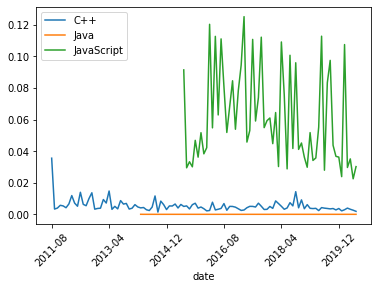

In [3]:
# mean skip rate
df2 = df.copy()
df2['skip_rate'] = df2['skipped_file_count'] / df2['file_count']
df2 = df2.groupby(['date', 'language']).mean().reset_index()
df2 = df2.pivot(index='date', columns='language', values='skip_rate')
fig = df2.plot(rot=45, legend=False).legend(['C++', 'Java', 'JavaScript']).get_figure()
# fig.savefig(f'{figures_dir}/skip_rate.pgf')

/Users/tkacperek/virtualenvs/mgr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


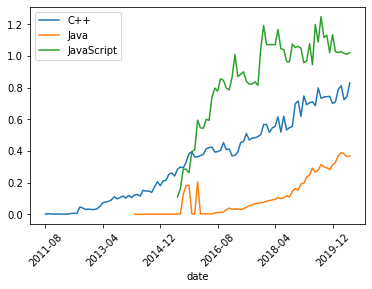

In [4]:
# mean lambda rate
df2 = df.groupby(['date', 'language']).mean().reset_index()
df2 = df2.pivot(index='date', columns='language', values='lambda_rate')
fig = df2.plot(rot=45, legend=False).legend(['C++', 'Java', 'JavaScript']).get_figure()
# fig.savefig(f'{figures_dir}/lambda_rate.pgf')

/Users/tkacperek/virtualenvs/mgr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


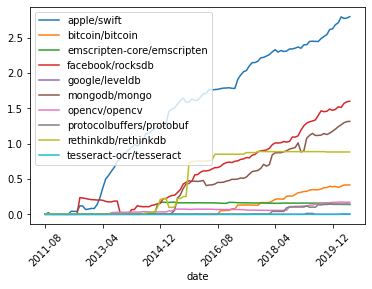

In [5]:
# lambda rates in cpp
df2 = df[df['language'] == 'cpp']
df2 = df2.pivot(index='date', columns='nameWithOwner', values='lambda_rate')
df2.fillna(method='ffill', inplace=True)
fig = df2.plot(rot=45, legend=False).legend().get_figure()
# fig.savefig(f'{figures_dir}/lambda_rate_cpp.pgf')

/Users/tkacperek/virtualenvs/mgr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


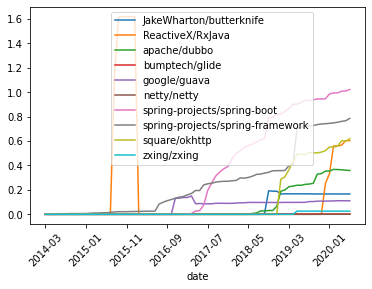

In [6]:
# lambda rates in java
df2 = df[df['language'] == 'java']
df2 = df2.pivot(index='date', columns='nameWithOwner', values='lambda_rate')
df2.fillna(method='ffill', inplace=True)
fig = df2.plot(rot=45, legend=False).legend(loc='upper right', bbox_to_anchor=(0.86, 1)).get_figure()
# fig.savefig(f'{figures_dir}/lambda_rate_java.pgf')

/Users/tkacperek/virtualenvs/mgr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


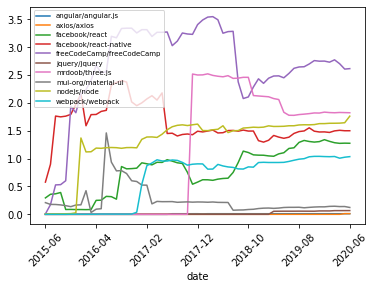

In [7]:
# lambda rates in js
df2 = df[df['language'] == 'js']
df2 = df2.pivot(index='date', columns='nameWithOwner', values='lambda_rate')
df2.fillna(method='ffill', inplace=True)
fig = df2.plot(rot=45, legend=False).legend(loc='upper left', fontsize='x-small').get_figure()
# fig.savefig(f'{figures_dir}/lambda_rate_js.pgf')